In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('datasets/telco.csv', parse_dates=['date'])

sample = data.sample(10)
sample

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,date,activity,Churn
5006,9103-TCIHJ,Female,0,No,No,NaN,Yes,Yes,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,55.70,899.8,2022-02-01,inactive,Yes
6399,2101-RANCD,Female,0,No,No,55.0,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,73.10,4144.9,2022-02-01,active,No
1601,2927-QRRQV,Male,0,Yes,No,46.0,Yes,Yes,Fiber optic,No,...,Yes,No,One year,Yes,Electronic check,94.65,4312.5,2022-02-01,active,No
203,7018-WBJNK,Male,0,No,Yes,13.0,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),78.30,1033.95,2022-02-01,inactive,No
5630,9801-GDWGV,Female,0,No,No,39.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,103.45,3994.45,2022-02-01,inactive,Yes
2306,7245-NIIWQ,Female,0,No,No,3.0,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,69.85,199.85,2022-02-01,active,No
5735,9251-AWQGT,Female,0,Yes,Yes,48.0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,935.9,2022-02-01,active,No
5765,1265-XTECC,Female,1,Yes,No,68.0,Yes,Yes,Fiber optic,Yes,...,No,Yes,One year,Yes,Credit card (automatic),96.55,6581.9,2022-02-01,inactive,Yes
4787,5542-DHSXL,Female,0,Yes,No,4.0,Yes,No,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,54.70,235.05,2022-02-01,active,No
5448,0580-PIQHM,Female,0,Yes,Yes,41.0,Yes,Yes,Fiber optic,Yes,...,No,Yes,One year,Yes,Bank transfer (automatic),101.60,3930.55,2022-02-01,active,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   SeniorCitizen     7043 non-null   int64         
 3   Partner           7043 non-null   object        
 4   Dependents        7043 non-null   object        
 5   tenure            5640 non-null   float64       
 6   PhoneService      7043 non-null   object        
 7   MultipleLines     7043 non-null   object        
 8   InternetService   7043 non-null   object        
 9   OnlineSecurity    7043 non-null   object        
 10  OnlineBackup      7043 non-null   object        
 11  DeviceProtection  7043 non-null   object        
 12  TechSupport       7043 non-null   object        
 13  StreamingTV       7043 non-null   object        
 14  StreamingMovies   7043 n

In [4]:
# Check data for missing values
data.isnull().sum().sort_values(ascending=False)

tenure              1403
customerID             0
TechSupport            0
activity               0
date                   0
TotalCharges           0
MonthlyCharges         0
PaymentMethod          0
PaperlessBilling       0
Contract               0
StreamingMovies        0
StreamingTV            0
DeviceProtection       0
gender                 0
OnlineBackup           0
OnlineSecurity         0
InternetService        0
MultipleLines          0
PhoneService           0
Dependents             0
Partner                0
SeniorCitizen          0
Churn                  0
dtype: int64

In [5]:
# Get a pd Series comprising all numericals
numeric_data = data.select_dtypes(include=('number')) # filtering by numericals
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,5640.0,32.346809,24.423372,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

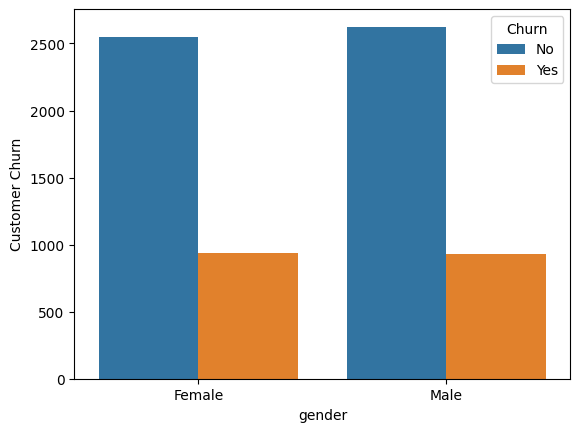

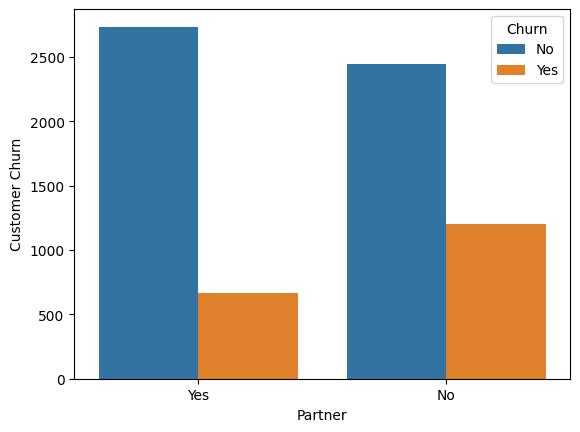

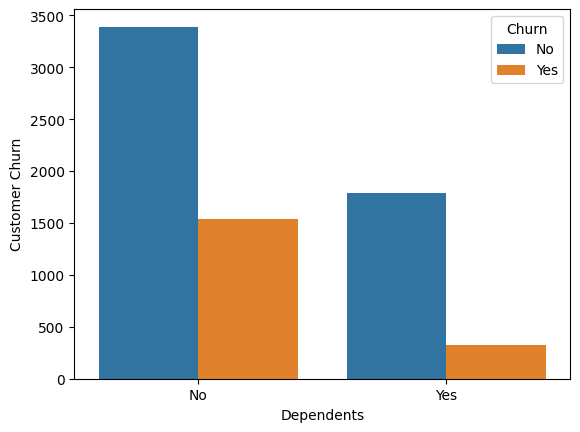

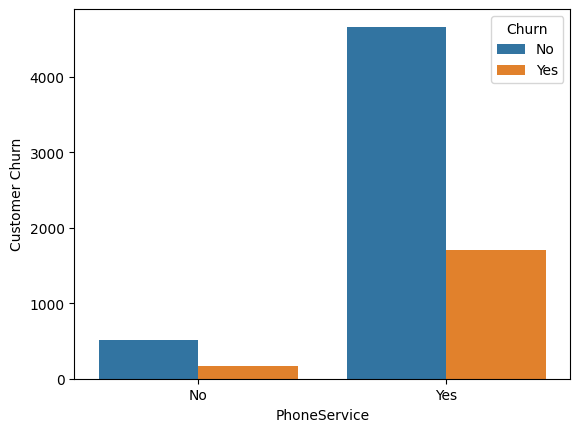

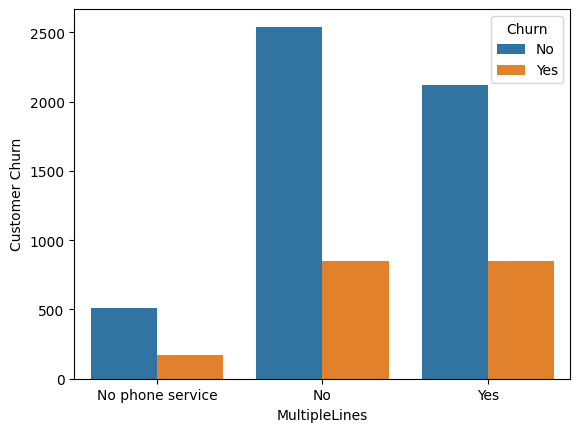

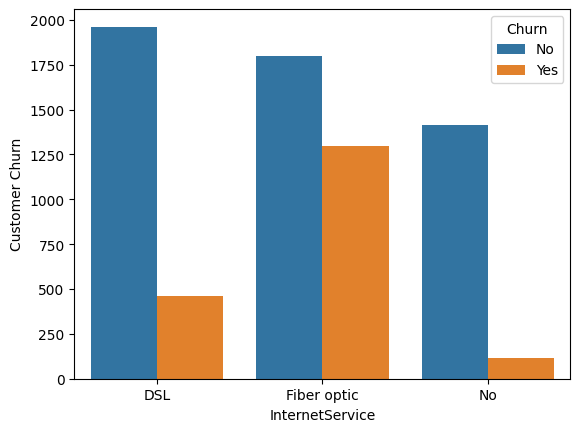

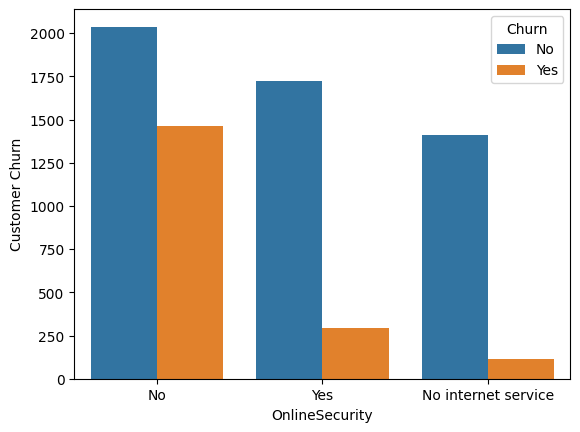

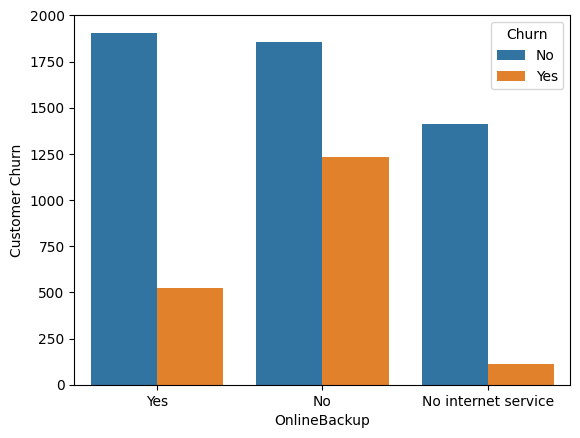

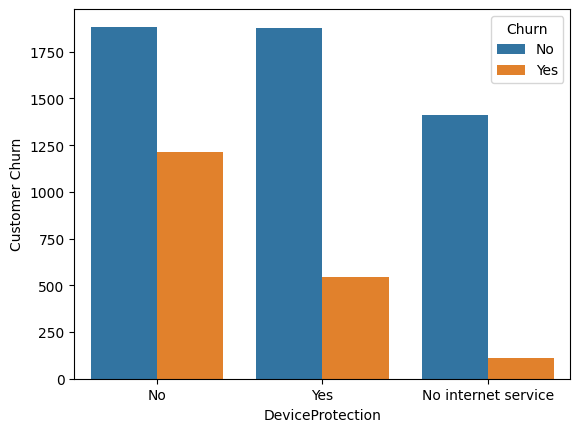

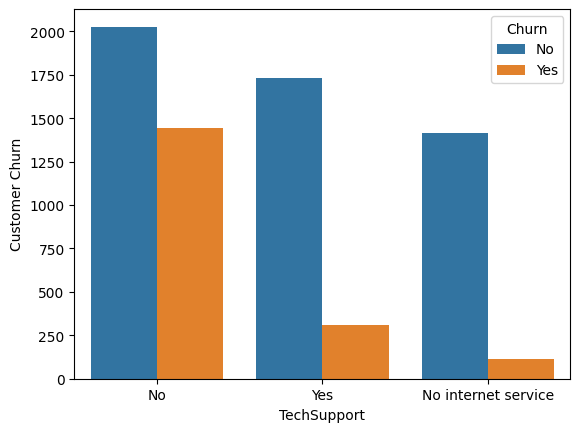

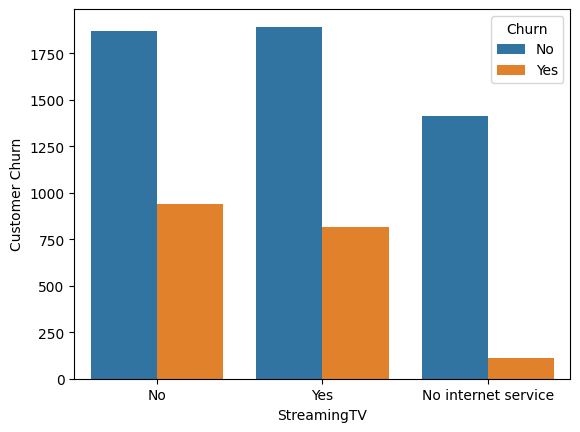

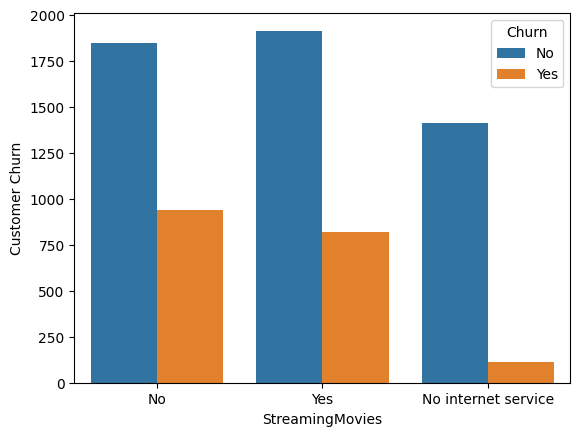

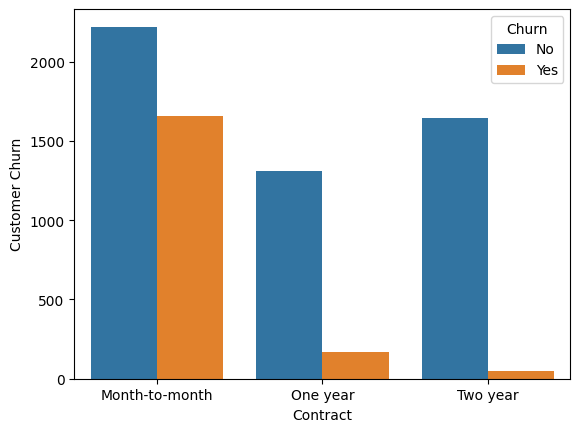

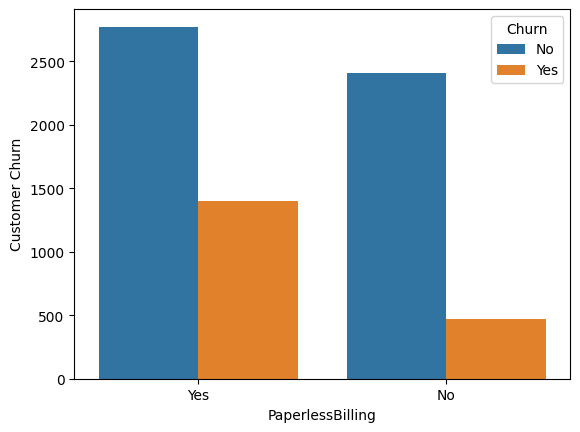

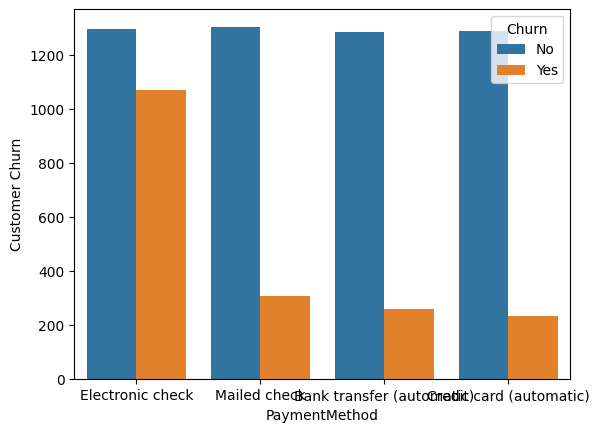

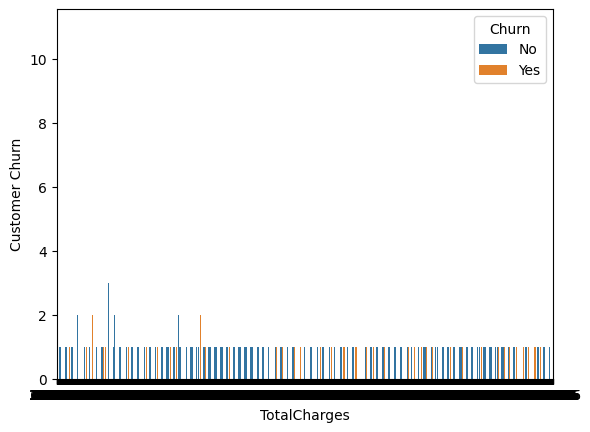

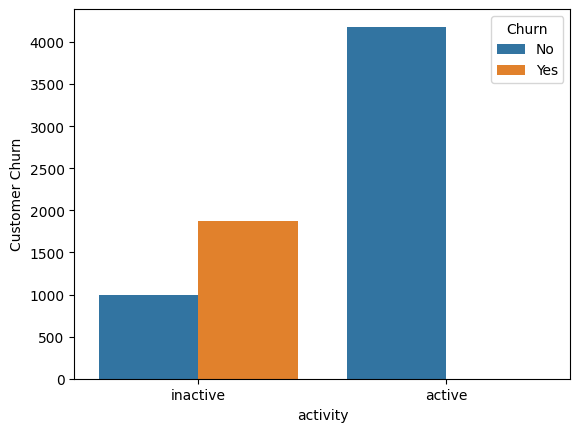

In [9]:
categorical_cols = [col for col in data if data[col].dtype in ['object']]
categorical_cols = categorical_cols[1:-1]

for col in categorical_cols:
    sns.countplot(x=data[col], hue=data['Churn'])
    plt.xlabel(col)
    plt.ylabel('Customer Churn')
    plt.show()

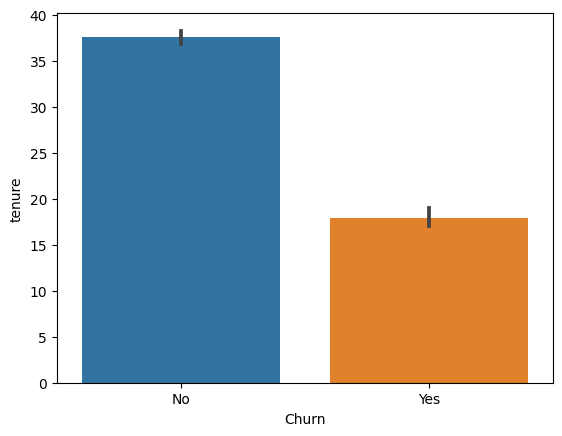

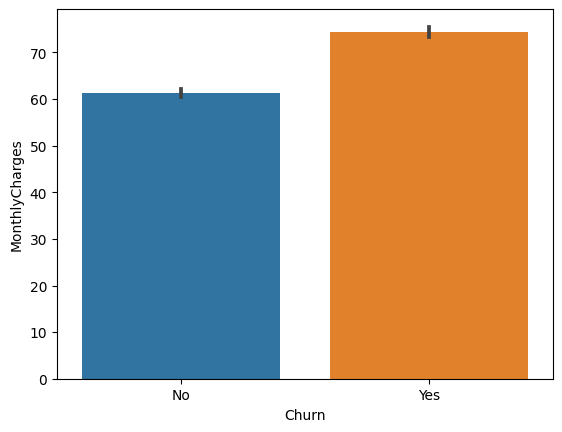

In [16]:
sns.barplot(x=data['Churn'],y=numeric_data['tenure'])
plt.show()
sns.barplot(x=data['Churn'], y=numeric_data['MonthlyCharges'])
plt.show()

Customers who suscribed to the monthly charges churn more


In [17]:
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [ ]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map numeric month values to month names
data['month'] = data['month'].map(month_names)

data.head()

Churn is far less in April than it is in February, why is that?


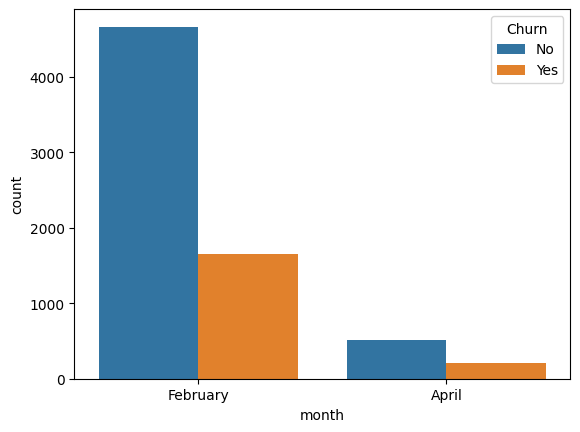

In [27]:
sns.countplot(x='month',hue='Churn', data=data)
plt.show()

Let us check in which month churn rate is higher, it turns out to be April

In [35]:
april_data = data[data['month'] == 'April']
feb_data = data[data['month'] == 'February']

churn_rate = data.groupby('month')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
churn_rate = churn_rate.map('{:.2f}%'.format)
print(churn_rate)

Number of rows in April:  722
Number of rows in February:  6321
month
April       29.22%
February    26.23%
Name: Churn, dtype: object


Now we proceed to prediction, first we train the data.
